In [27]:
from ase.io import read
atoms=read('optimized.vasp',format='vasp')
import numpy as np
natom=len(atoms.positions)
nmodes=natom*3
dyn_file='Dyn.form'
lammps_dyn=np.loadtxt(dyn_file).reshape((nmodes,nmodes))
eigenvalue, eigenvector=np.linalg.eigh(lammps_dyn)

In [28]:
kmin=2.0*np.pi/atoms.cell[0,0]

In [29]:
kmax=kmin*10
kvec=np.linspace(kmin,kmax,50)
n_kpt=len(kvec)

In [30]:
import pyAF.constants
pc=pyAF.constants.physical_constants()
omega=[]
nmodes=len(eigenvalue)
#extract minimum index of negative frequency
mode_negative=0
for i in range(nmodes):
    if eigenvalue[i] <0.0:
        val=0
        omega.append(val)
        mode_negative=i
    else:
        val=np.sqrt(eigenvalue[i])*pc.scale_THz
        omega.append(val)

energy THz 2.814476797372754, energy meV 11.639747256590578


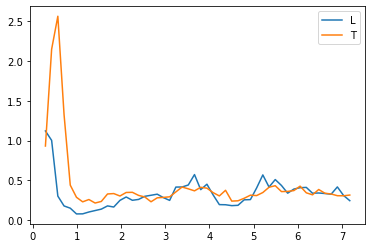

In [31]:
import pyAF.postprocess

#cheking Fourier component

id=50
n_sample=10
E=omega[id]
print(f'energy THz {E}, energy meV {E*4.13567}')
position=atoms.positions
ev=eigenvector[:,id]

kvec=np.linspace(kmin,kmin*25,50)
C_L=[]
C_T=[]
for k in kvec:
    k_vector=pyAF.postprocess.polar_coord_sampling(n_sample,k)
    tmp_L=np.zeros(n_sample*n_sample)
    tmp_T=np.zeros(n_sample*n_sample)
    for i,vec in enumerate(k_vector):

        unit_vector_L=vec/np.linalg.norm(vec)
        tmp_L[i], tmp_T[i]=pyAF.postprocess.get_Ci_ver2(ev,position,vec)
    C_L.append(np.mean(tmp_L))
    C_T.append(np.mean(tmp_T))


import matplotlib.pyplot as plt
plt.plot(kvec,C_L,label='L')
plt.plot(kvec,C_T,label='T')
plt.legend()

In [32]:
#run only for initial calculation
'''
from tqdm import tqdm
import pyAF.postprocess
n_sample=8
n_modes=natom*3
C_L=np.zeros((n_kpt,n_modes))
C_T=np.zeros((n_kpt,n_modes))
position=atoms.positions

for ik,k in enumerate(tqdm(kvec)):
    k_vector=pyAF.postprocess.polar_coord_sampling(n_sample,k)

    for imode in range(nmodes):
        ev=eigenvector[:,imode]
        tmp_L=np.zeros(n_sample*n_sample)
        tmp_T=np.zeros(n_sample*n_sample)
        for i,vec in enumerate(k_vector):

            unit_vector_L=vec/np.linalg.norm(vec)
            tmp_L[i], tmp_T[i]=pyAF.postprocess.get_Ci_ver2(ev,position,vec)
        C_L[ik,imode]=np.mean(tmp_L)
        C_T[ik,imode]=np.mean(tmp_T)
'''

'\nfrom tqdm import tqdm\nimport pyAF.postprocess\nn_sample=8\nn_modes=natom*3\nC_L=np.zeros((n_kpt,n_modes))\nC_T=np.zeros((n_kpt,n_modes))\nposition=atoms.positions\n\nfor ik,k in enumerate(tqdm(kvec)):\n    k_vector=pyAF.postprocess.polar_coord_sampling(n_sample,k)\n\n    for imode in range(nmodes):\n        ev=eigenvector[:,imode]\n        tmp_L=np.zeros(n_sample*n_sample)\n        tmp_T=np.zeros(n_sample*n_sample)\n        for i,vec in enumerate(k_vector):\n\n            unit_vector_L=vec/np.linalg.norm(vec)\n            tmp_L[i], tmp_T[i]=pyAF.postprocess.get_Ci_ver2(ev,position,vec)\n        C_L[ik,imode]=np.mean(tmp_L)\n        C_T[ik,imode]=np.mean(tmp_T)\n'

In [33]:
'''
np.save('C_L_512',C_L)
np.save('C_T_512',C_T)
'''


"\nnp.save('C_L_512',C_L)\nnp.save('C_T_512',C_T)\n"

In [34]:
import numpy as np
C_L=np.load('C_L_512.npy')
C_T=np.load('C_T_512.npy')

In [35]:
mesh_energy=np.linspace(0,15,100)

In [36]:
C_L.shape[0]

50

In [37]:
import pyAF.postprocess

In [38]:
dsf_L, dsf_T=pyAF.postprocess.dynamic_structure_factor(C_L=C_L, C_T=C_T, mesh_energy=mesh_energy, frequency=omega, smearing=0.05)

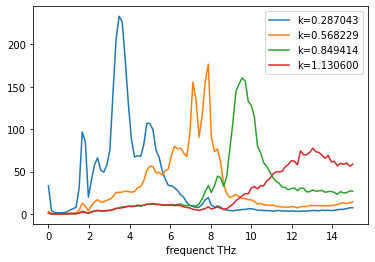

In [50]:
import matplotlib.pyplot as plt
plt.plot(mesh_energy,dsf_L[0,:],label='k={0:3f}'.format(kvec[0]))
plt.plot(mesh_energy,dsf_L[2,:],label='k={0:3f}'.format(kvec[2]))
plt.plot(mesh_energy,dsf_L[4,:],label='k={0:3f}'.format(kvec[4]))
plt.plot(mesh_energy,dsf_L[6,:],label='k={0:3f}'.format(kvec[6]))

plt.xlabel('frequenct THz')
plt.legend()
plt.savefig('S_L_512atom.png')

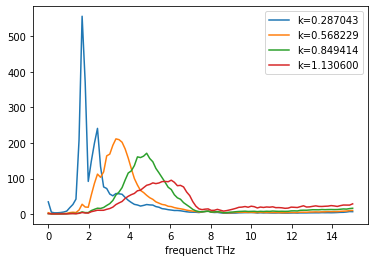

In [51]:
import matplotlib.pyplot as plt
plt.plot(mesh_energy,dsf_T[0,:],label='k={0:3f}'.format(kvec[0]))
plt.plot(mesh_energy,dsf_T[2,:],label='k={0:3f}'.format(kvec[2]))
plt.plot(mesh_energy,dsf_T[4,:],label='k={0:3f}'.format(kvec[4]))
plt.plot(mesh_energy,dsf_T[6,:],label='k={0:3f}'.format(kvec[6]))

plt.xlabel('frequenct THz')
plt.legend()
plt.savefig('S_T_512atom.png')